### Goal: 
##### To build a text classification model to predict the artist from a piece of text

In [1]:
#To make this scrapper look legitimate, we spoof the headers we send along with our requests

import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

1. Download HTML pages --> 2. Get a list of song urls --> 3. Extract lyrics from song urls

In [2]:
BASE_URL = "https://www.lyrics.com"

def get_lyrics(path):
    new_url = BASE_URL + path
    r = requests.get(new_url)
    soup = BeautifulSoup(r.content , 'html.parser')
    return soup.find('h1').text, soup.find('pre').text

In [3]:
url = BASE_URL + "/artist/Enya/4197"

r = requests.get(url)
soup = BeautifulSoup(r.content , 'html.parser')
tags = soup.find_all('strong')

song_links = []
# iterate over each song entry and grab the link to the lyrics
for content in tags:
    link = content.find('a')
    if link and link['href'].startswith('/lyric'):
        song_links.append(link['href'])

In [4]:
songs = {}
# then we iterate over all the lyric links and get the lyrics for each song
# those lyrics are then stored in songs[song_title]
for l in song_links:
    song,lyrics = get_lyrics(l)
    songs[song] = lyrics

In [6]:
songs

{"I Don't Wanna Know": "I just can't believe this man\nJust another night of these thoughts\nCan't get this outta my head, yeah\n\nSomebody said they saw you\nThe person you were kissing wasn't me\nAnd I would never ask you\nI just kept it to myself\n\nI don't wanna know\nIf you're playin' me, keep it on the low\nCuz my heart can't take it anymore\nAnd if you're creepin', please don't let it show\nOh baby, I don't wanna know\n\nOh baby\nI think about it when I hold you\nWhen looking in your eyes, I can't believe\nI don't need to know the truth\nBaby, keep it to yourself\n\nI don't wanna know\nIf you're playin' me, keep it on the low\nCuz my heart can't take it anymore\nAnd if you're creepin', please don't let it show\nOh baby, I don't wanna know\n\nDid he touch you better than me\nDid he watch you fall asleep\nDid you show him all those things\nThat you used to do to me\nIf you're better off that way\nBaby all that I can say\nIf you're gonna do your thing\nThen don't come back to me\n\

In [7]:
print (songs['Only Time'])

Who can say where the road goes
Where the day flows, only time
And who can say if your love grows
As your heart chose, only time

Who can say why your heart sighs
As your love flies, only time
And who can say why your heart cries
When your love lies, only time

Who can say when the roads meet
That love might be in your heart
And who can say when the day sleeps
If the night keeps all your heart
Night keeps all your heart

Who can say if your love grows
As your heart chose, only time
And who can say where the road goes
Where the day flows, only time

Who knows? Only time
Who knows? Only time


In [35]:
df = pd.DataFrame(list(songs.items()),columns = ['Title','Lyrics'])
df['Artist']='Enya'
df.head(2)

,Title,Lyrics,Artist
0,I Don't Wanna Know,I just can't believe this man\nJust another ni...,Enya
1,The Humming,"And all the light, will be, will be\nAnd all t...",Enya


In [36]:
df.shape

(106, 3)

In [38]:
df = df.drop_duplicates(subset=['Lyrics'], keep='first')
df.shape

(104, 3)

In [39]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #to display all rows

In [40]:
df

,Title,Lyrics,Artist
0,I Don't Wanna Know,I just can't believe this man\nJust another ni...,Enya
1,The Humming,"And all the light, will be, will be\nAnd all t...",Enya
2,The Loxian Gate,Ora beyhe o llay ay o ay a bey ah llay\n'Ora b...,Enya
3,So I Could Find My Way,A thousand dreams you gave to me\nYou held me ...,Enya
4,Even In The Shadows,Even in the shadows\nI turn around\nTo find yo...,Enya
5,Echoes in Rain,"Ah, ah, ah, ah, ah, ah, ah, ah\nAh, ah, ah, ah...",Enya
6,I Could Never Say Goodbye,Night has gone without my tears\nNow I walk al...,Enya
7,Dark Sky Island,Listen to the waves speak up\nThe blue voice o...,Enya
8,Sancta Maria,Sancta Maria\nSancta Maria\nSancta Maria\nSanc...,Enya
9,Diamonds On The Water,Listen to the river\nIt echoes softly\nDriftin...,Enya


In [29]:
import re

#clean the data by removing all special chaacters

df['c_lyrics'] = df['Lyrics'].str.replace('\W', ' ')
#df['lyricss'] = df['Lyrics'].map(lambda x: re.sub(r'\W+', ' ', x))
df.head(4)

,Title,Lyrics,Artist,c_lyrics
0,I Don't Wanna Know,I just can't believe this man\nJust another ni...,Enya,I just can t believe this man Just another nig...
1,The Humming,"And all the light, will be, will be\nAnd all t...",Enya,And all the light will be will be And all th...
2,The Loxian Gate,Ora beyhe o llay ay o ay a bey ah llay\n'Ora b...,Enya,Ora beyhe o llay ay o ay a bey ah llay Ora be...
3,So I Could Find My Way,A thousand dreams you gave to me\nYou held me ...,Enya,A thousand dreams you gave to me You held me h...


In [30]:
df.drop('Lyrics', axis=1, inplace=True) #where 1 is the axis number (0 for rows and 1 for columns)
df.head(4)

,Title,Artist,c_lyrics
0,I Don't Wanna Know,Enya,I just can t believe this man Just another nig...
1,The Humming,Enya,And all the light will be will be And all th...
2,The Loxian Gate,Enya,Ora beyhe o llay ay o ay a bey ah llay Ora be...
3,So I Could Find My Way,Enya,A thousand dreams you gave to me You held me h...


In [31]:
df['c_lyrics'] = df['c_lyrics'].str.lower()
df.to_csv('enya.csv', index=False)
df.head(2)

,Title,Artist,c_lyrics
0,I Don't Wanna Know,Enya,i just can t believe this man just another nig...
1,The Humming,Enya,and all the light will be will be and all th...


**WordCloud**

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 71071 words in the combination of all review.


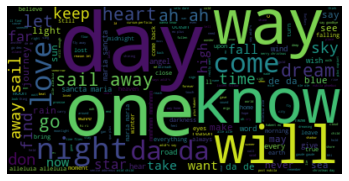

In [34]:
text = " ".join(review for review in df.c_lyrics)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["i", "m", "to", "a", "re", "me", "us", "ve", "s", "t", "ve", "re", "to", "is", "in"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("../Image/enya.png")

**Further Processing/Cleaning**